K-means clustering

In [2]:
# Goal: Classify the data based on similar properties.

In [3]:
# The first dataset is an artificial dataset created for simple learning purposes, with variables that do not carry meaningful information. The second dataset contains selected variables and information extracted from customer
# data used during a LightGBM modeling task.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/snkn1959/data_source/main/example_cluster.csv')

In [7]:
df

,var_1,var_2
0,3.264413,6.929164
1,0.220814,2.251631
2,-8.786197,-8.333582
3,-0.008547,2.630791
4,4.912903,6.888520
...,...,...
995,4.678232,7.704404
996,5.250715,6.930948
997,-11.818752,-5.609853
998,0.613725,3.809334


<Axes: xlabel='var_1', ylabel='var_2'>

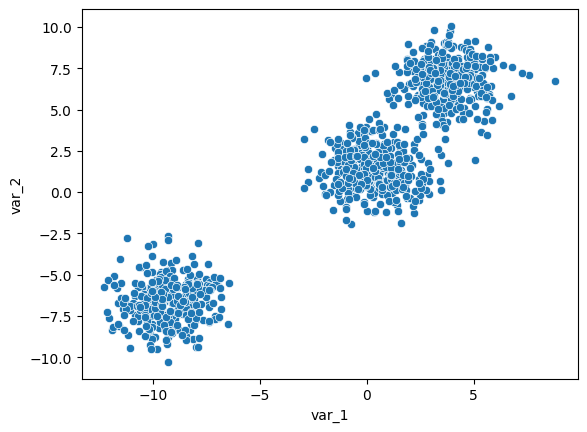

In [8]:
sns.scatterplot(x = 'var_1', y = 'var_2', data = df)

In [ ]:
# Data is clearly divided into three distinct groups.

In [9]:
from sklearn.cluster import KMeans
KM = KMeans(n_clusters = 3, random_state = 100)
KM.fit(df)

KMeans(n_clusters=3, random_state=100)

In [11]:
KM.predict(df)

array([2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 0, 1, 0, 2, 2, 0, 1, 0,
       0, 0, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 1,
       0, 2, 2, 1, 0, 1, 2, 0, 2, 1, 2, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2,
       1, 0, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 2,
       0, 1, 2, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 1, 0, 1, 0, 2, 2, 0, 2,
       1, 2, 0, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 2, 0, 1, 1, 2, 2, 1, 1, 2,
       2, 2, 1, 0, 2, 0, 2, 1, 2, 0, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 2, 0,
       1, 2, 0, 1, 1, 0, 1, 1, 2, 2, 2, 1, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 0, 0, 2, 1, 0,
       1, 1, 0, 2, 0, 0, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 1, 0,
       2, 0, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 2, 0, 2, 1,
       1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 0, 1, 0, 2, 0, 1, 1,
       1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1, 1,

In [12]:
df['label'] = KM.predict(df)

<Axes: xlabel='var_1', ylabel='var_2'>

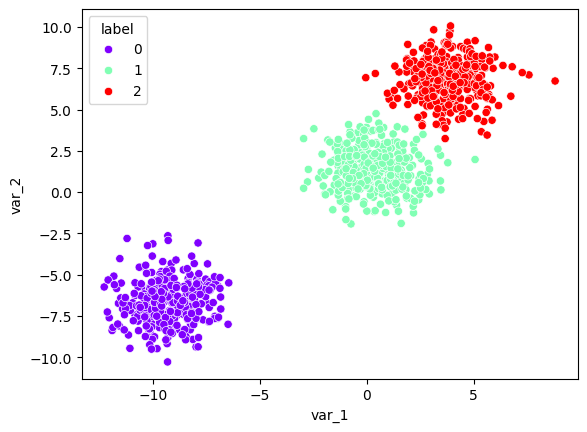

In [13]:
sns.scatterplot(x = 'var_1', y = 'var_2', data = df, hue = 'label',\
               palette = 'rainbow')

In [14]:
KM.inertia_

3090.033237076663

In [ ]:
# *Inertia: The sum of distances between each data point and the centroid of its assigned cluster.

# A lower inertia indicates that the data points within each cluster are more tightly grouped, suggesting better clustering performance.
# While a lower value is generally better, inertia will naturally decrease as the number of clusters (n_clusters or K) increases.
# Therefore, it's important to determine an appropriate K value for effective clustering.

In [15]:
distance = []

for k in range(2,10):
    KM = KMeans(n_clusters = k)
    KM.fit(df)
    distance.append(KM.inertia_)

In [16]:
distance

[9908.551424778409,
 3090.033237076663,
 2748.9221394427796,
 2528.081517560292,
 2380.687584917261,
 1937.572253554082,
 1609.6088682900813,
 1492.6373160332798]

<Axes: >

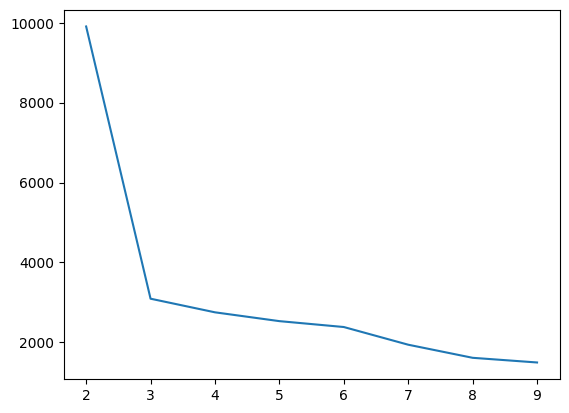

In [17]:
sns.lineplot(x = range(2,10), y = distance)

In [ ]:
# As the K value increases, the distance (inertia) gradually decreases.

# A noticeable and sharp change in the slope can be observed at K = 3.

# This indicates that the elbow method can be used to identify the optimal number of clusters by detecting the point where the inertia sharply drops,
# suggesting K = 3 as a suitable choice.